<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/Part_2_05_Custom_Activations_Initializers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, constraints
import matplotlib.pyplot as plt

In [4]:
# Step 1: Define Custom Activation
@tf.keras.utils.register_keras_serializable()
def custom_leaky_relu(x):
    return tf.where(x > 0, x, 0.05 * x)

In [5]:
# Step 2: Define Custom Initializer
class MyGlorotInitializer(keras.initializers.Initializer):
    def __call__(self, shape, dtype=None):
        limit = tf.sqrt(6.0 / (shape[0] + shape[1]))
        return tf.random.uniform(shape, -limit, limit, dtype=dtype)

In [6]:
# Step 3: Define Custom Regularizer
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, l1=0.01):
        self.l1 = l1
    def __call__(self, x):
        return self.l1 * tf.reduce_sum(tf.abs(x))

In [7]:
# Step 4: Define Custom Constraint
class PositiveWeightsOnly(constraints.Constraint):
    def __call__(self, w):
        return tf.nn.relu(w)

In [8]:
# Step 5: Load and Normalize Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [9]:
# Step 6: Build Model
model = keras.Sequential([
    layers.Dense(64, activation=custom_leaky_relu,
                 kernel_initializer=MyGlorotInitializer(),
                 kernel_regularizer=MyL1Regularizer(0.005),
                 kernel_constraint=PositiveWeightsOnly(),
                 input_shape=(13,)),
    layers.Dense(64, activation=custom_leaky_relu,
                 kernel_initializer=MyGlorotInitializer(),
                 kernel_regularizer=MyL1Regularizer(0.005),
                 kernel_constraint=PositiveWeightsOnly()),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
# Step 7: Train
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 567.3199 - mae: 21.9774 - val_loss: 570.5563 - val_mae: 21.7749
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 551.2394 - mae: 21.2424 - val_loss: 515.1566 - val_mae: 20.1253
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 497.3072 - mae: 19.5150 - val_loss: 461.7955 - val_mae: 18.5312
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 406.4949 - mae: 17.4759 - val_loss: 409.2602 - val_mae: 17.5138
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 389.2560 - mae: 16.8683 - val_loss: 352.9636 - val_mae: 16.0815
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 312.8833 - mae: 15.0535 - val_loss: 298.9601 - val_mae: 14.5334
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 277.6881 - mae: 13.8006 - val_loss: 263.4778 - val_mae: 13.3889
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 217.4491 - mae: 12.1813 - val_loss: 240.2163 - val_mae: 12.4893
Epoch 9/25
13/13 

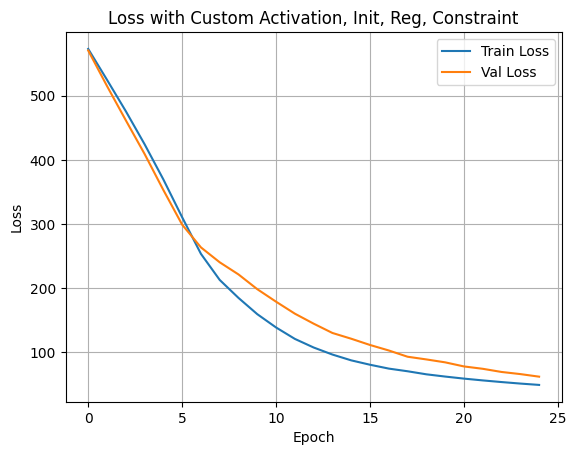

In [11]:
# Step 8: Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss with Custom Activation, Init, Reg, Constraint")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()